# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de concessão de cartões de crédito, publicado no Kaggle, uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está aqui.

Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.

Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados

A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


In [133]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(renda.groupby([var]).size())
metadata

,tipo,n_categorias
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
idade,int64,47
qt_pessoas_residencia,float64,9
renda,float64,9786
sexo_M,uint8,2
tipo_renda_Bolsista,uint8,2
tipo_renda_Empresário,uint8,2
tipo_renda_Pensionista,uint8,2


# Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [100]:
pip install pandas-profiling

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [134]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [135]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [130]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




In [136]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

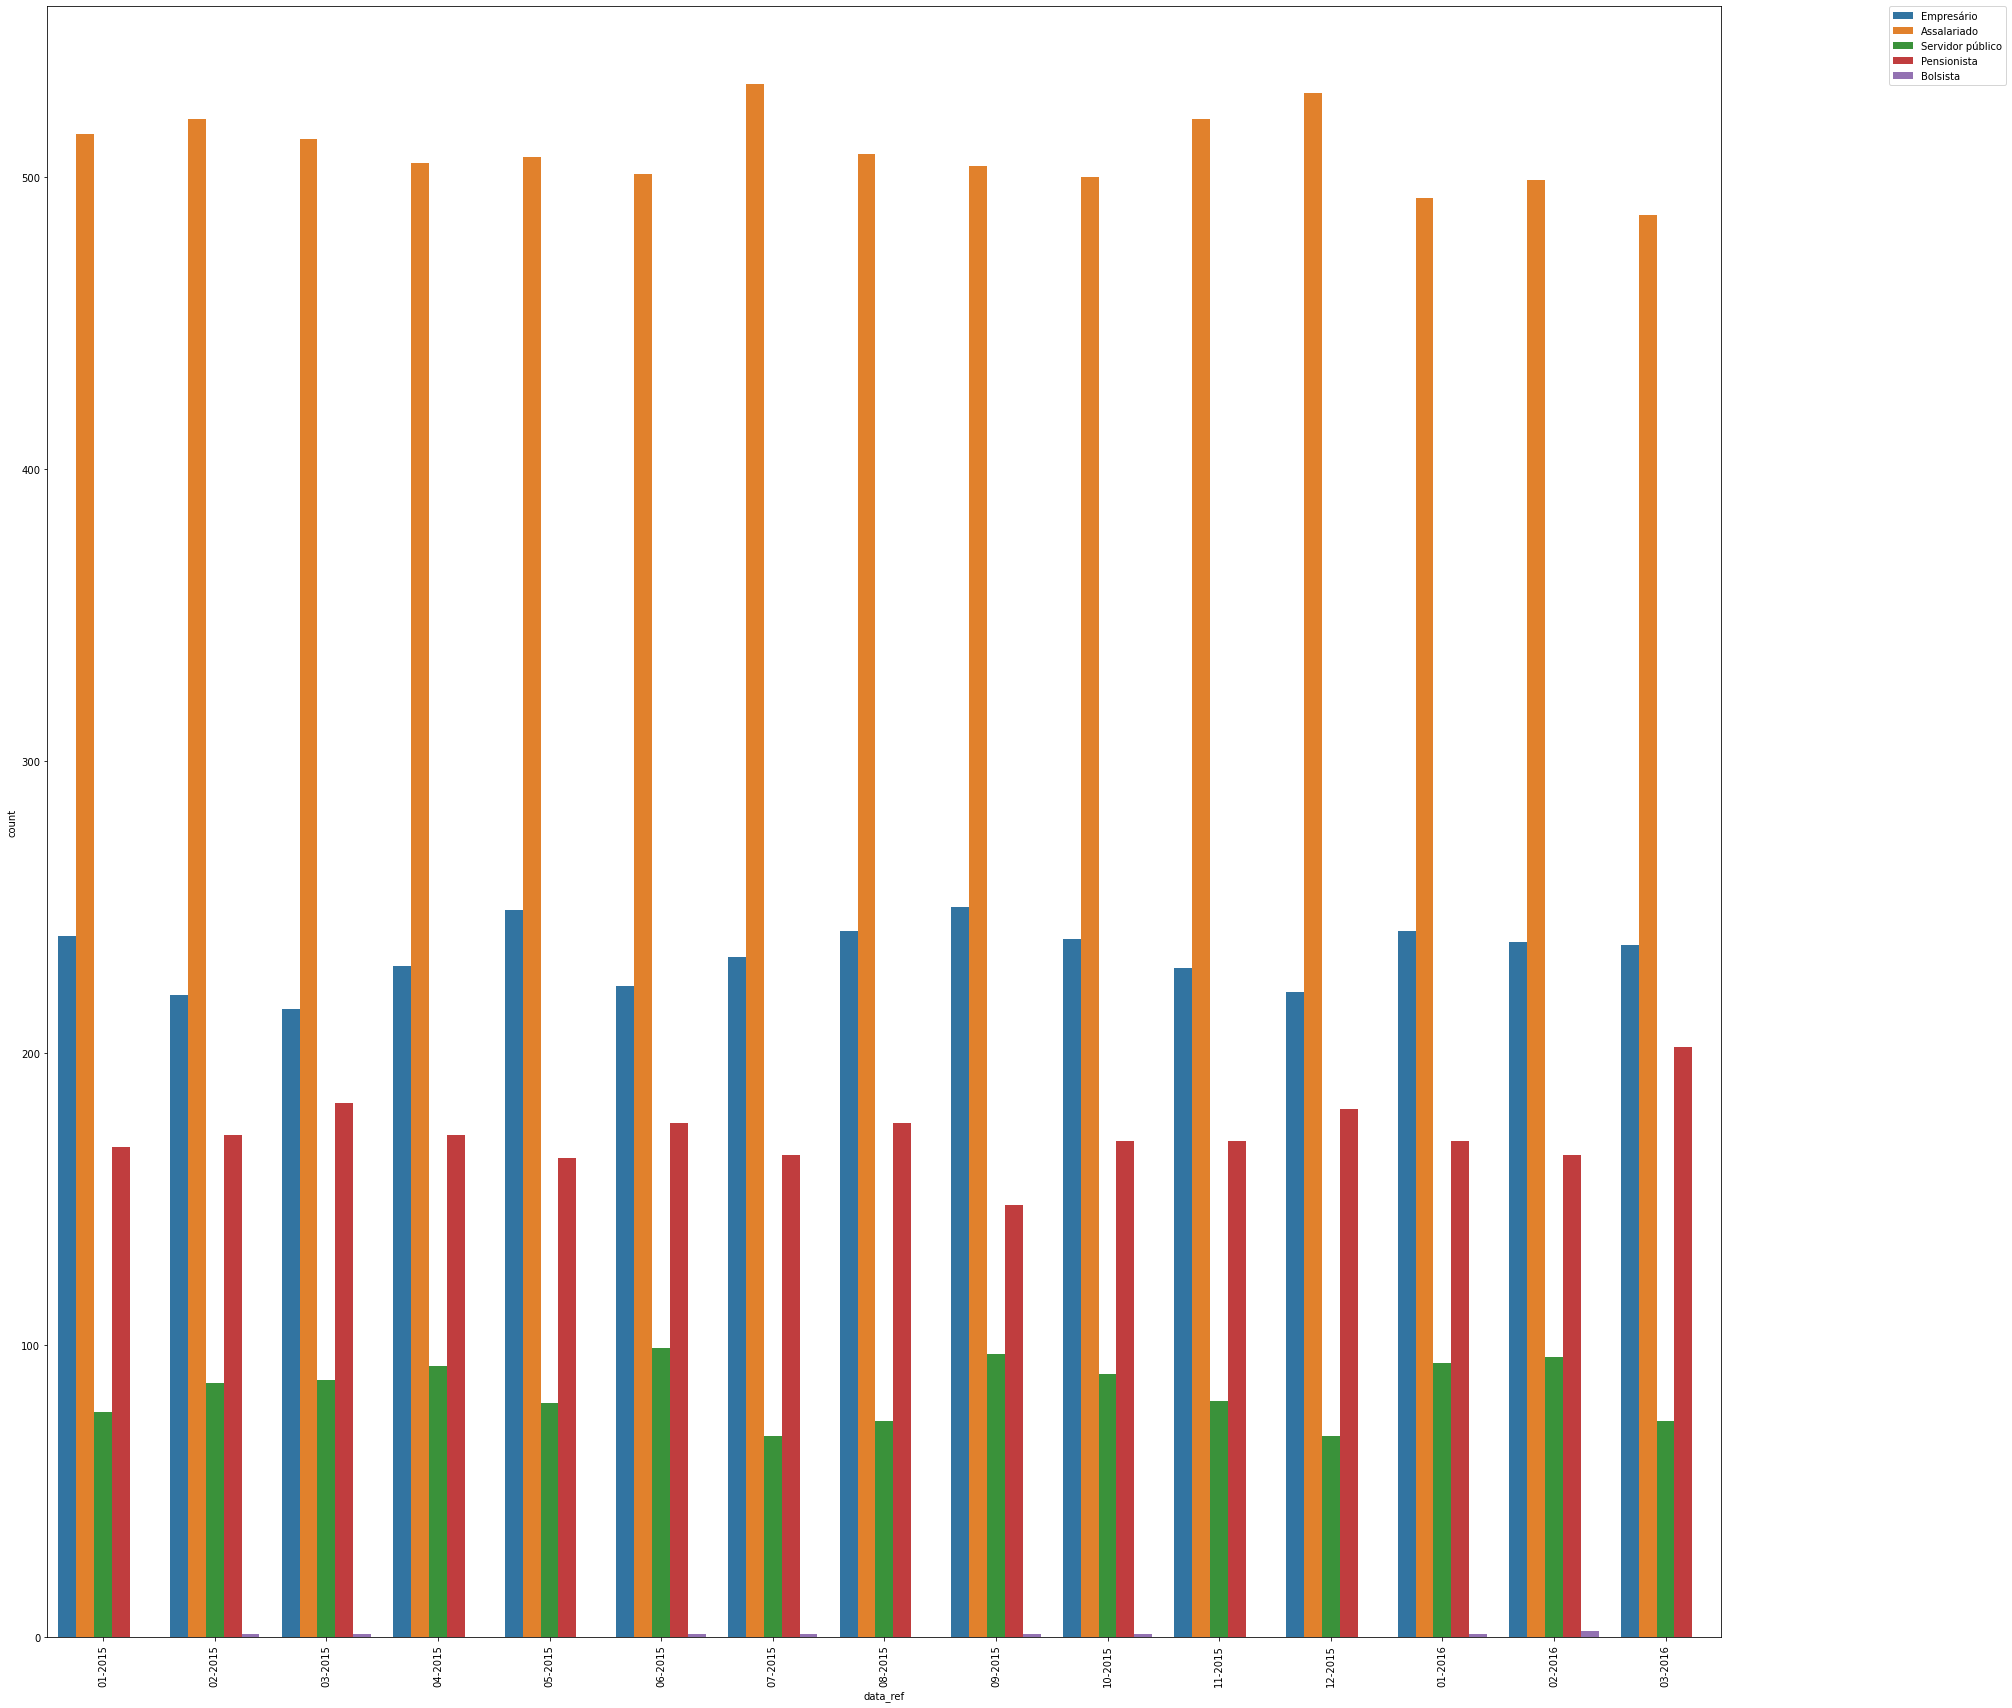

In [137]:
#variável tipo de renda

ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

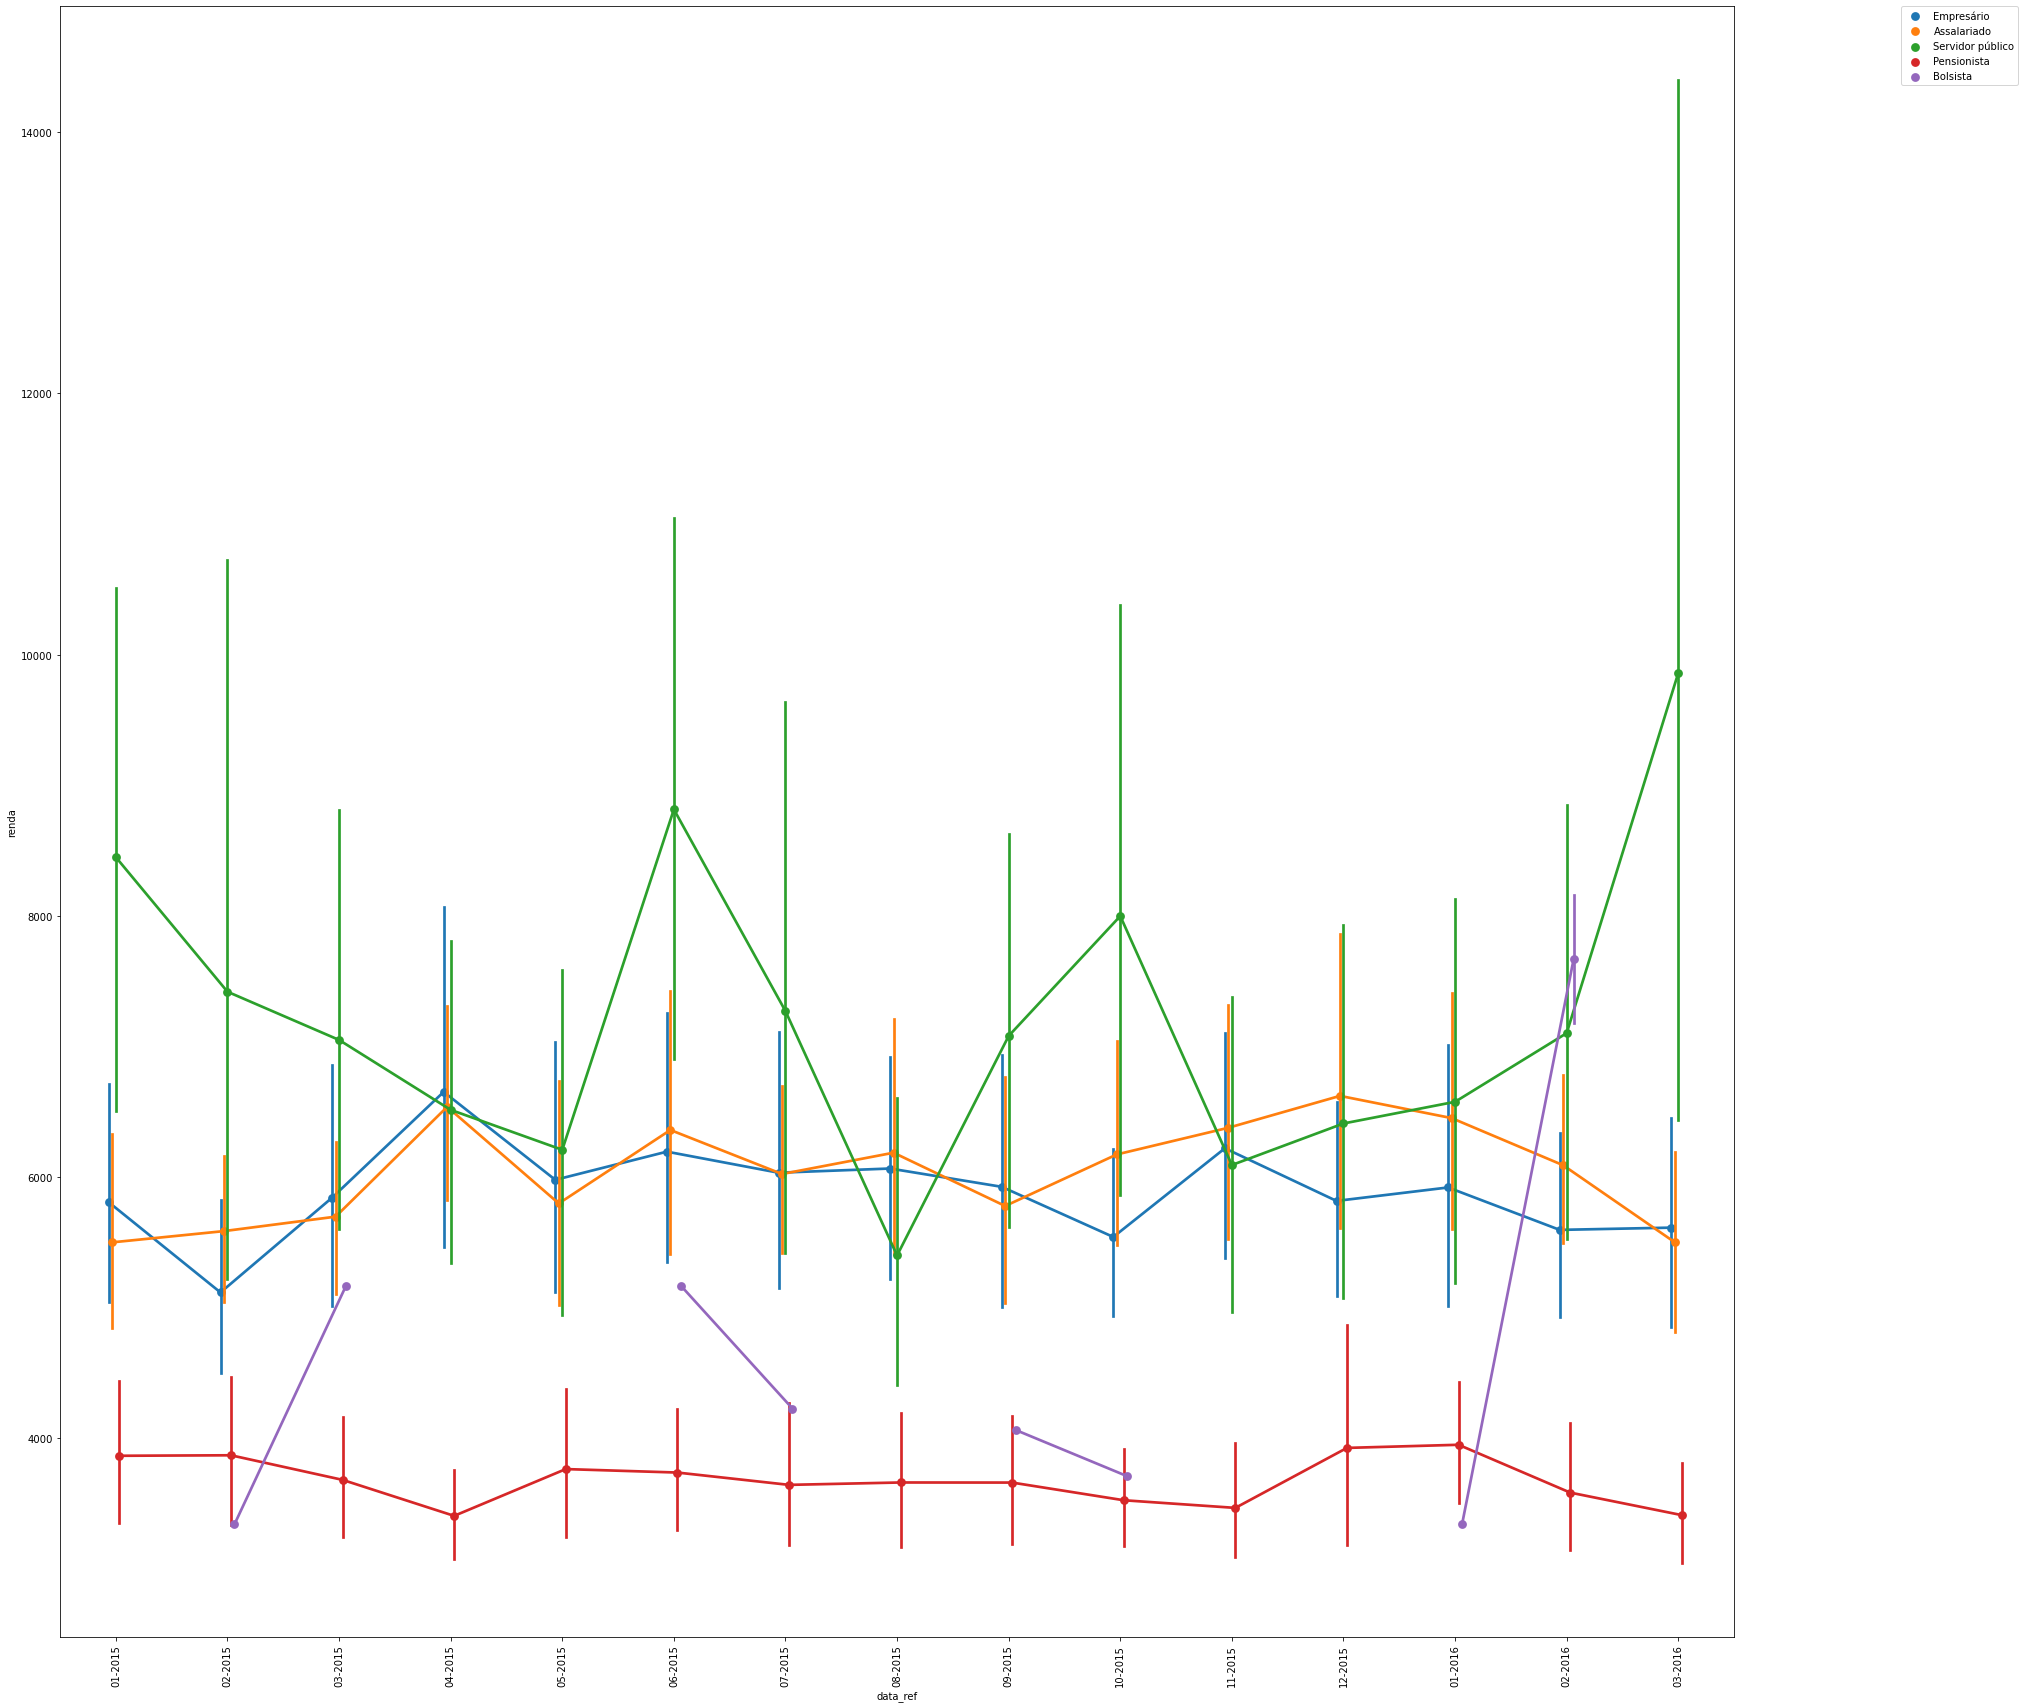

In [138]:
#variável tipo de renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

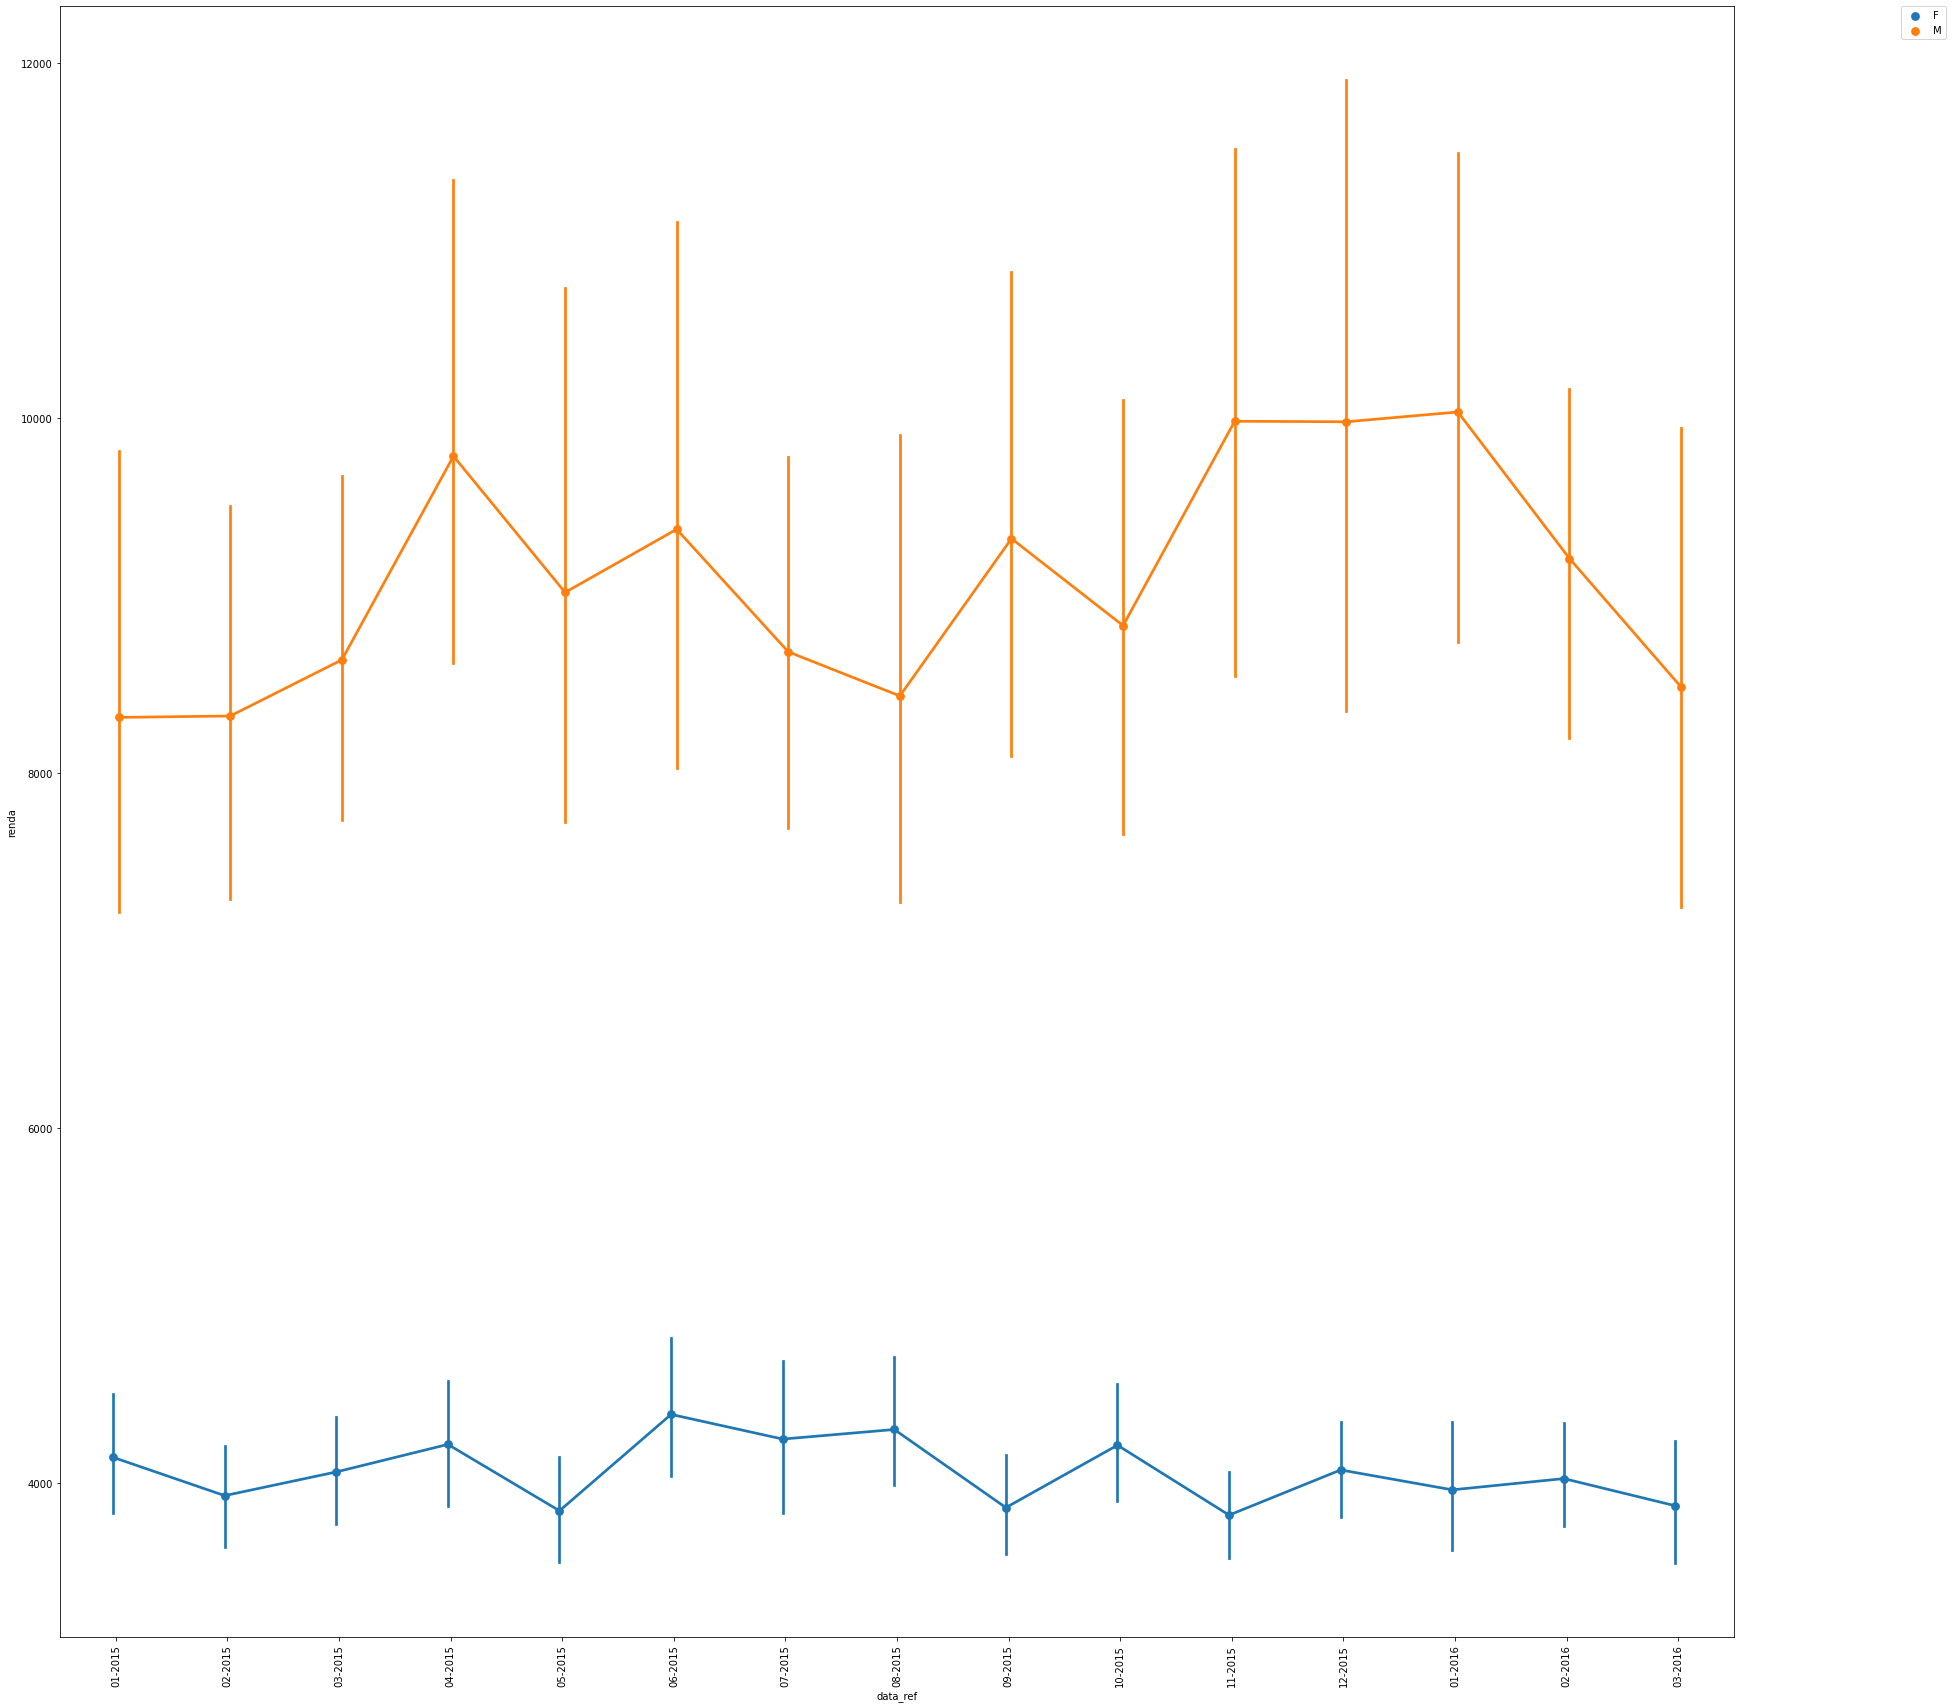

In [139]:
#variável sexo por renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

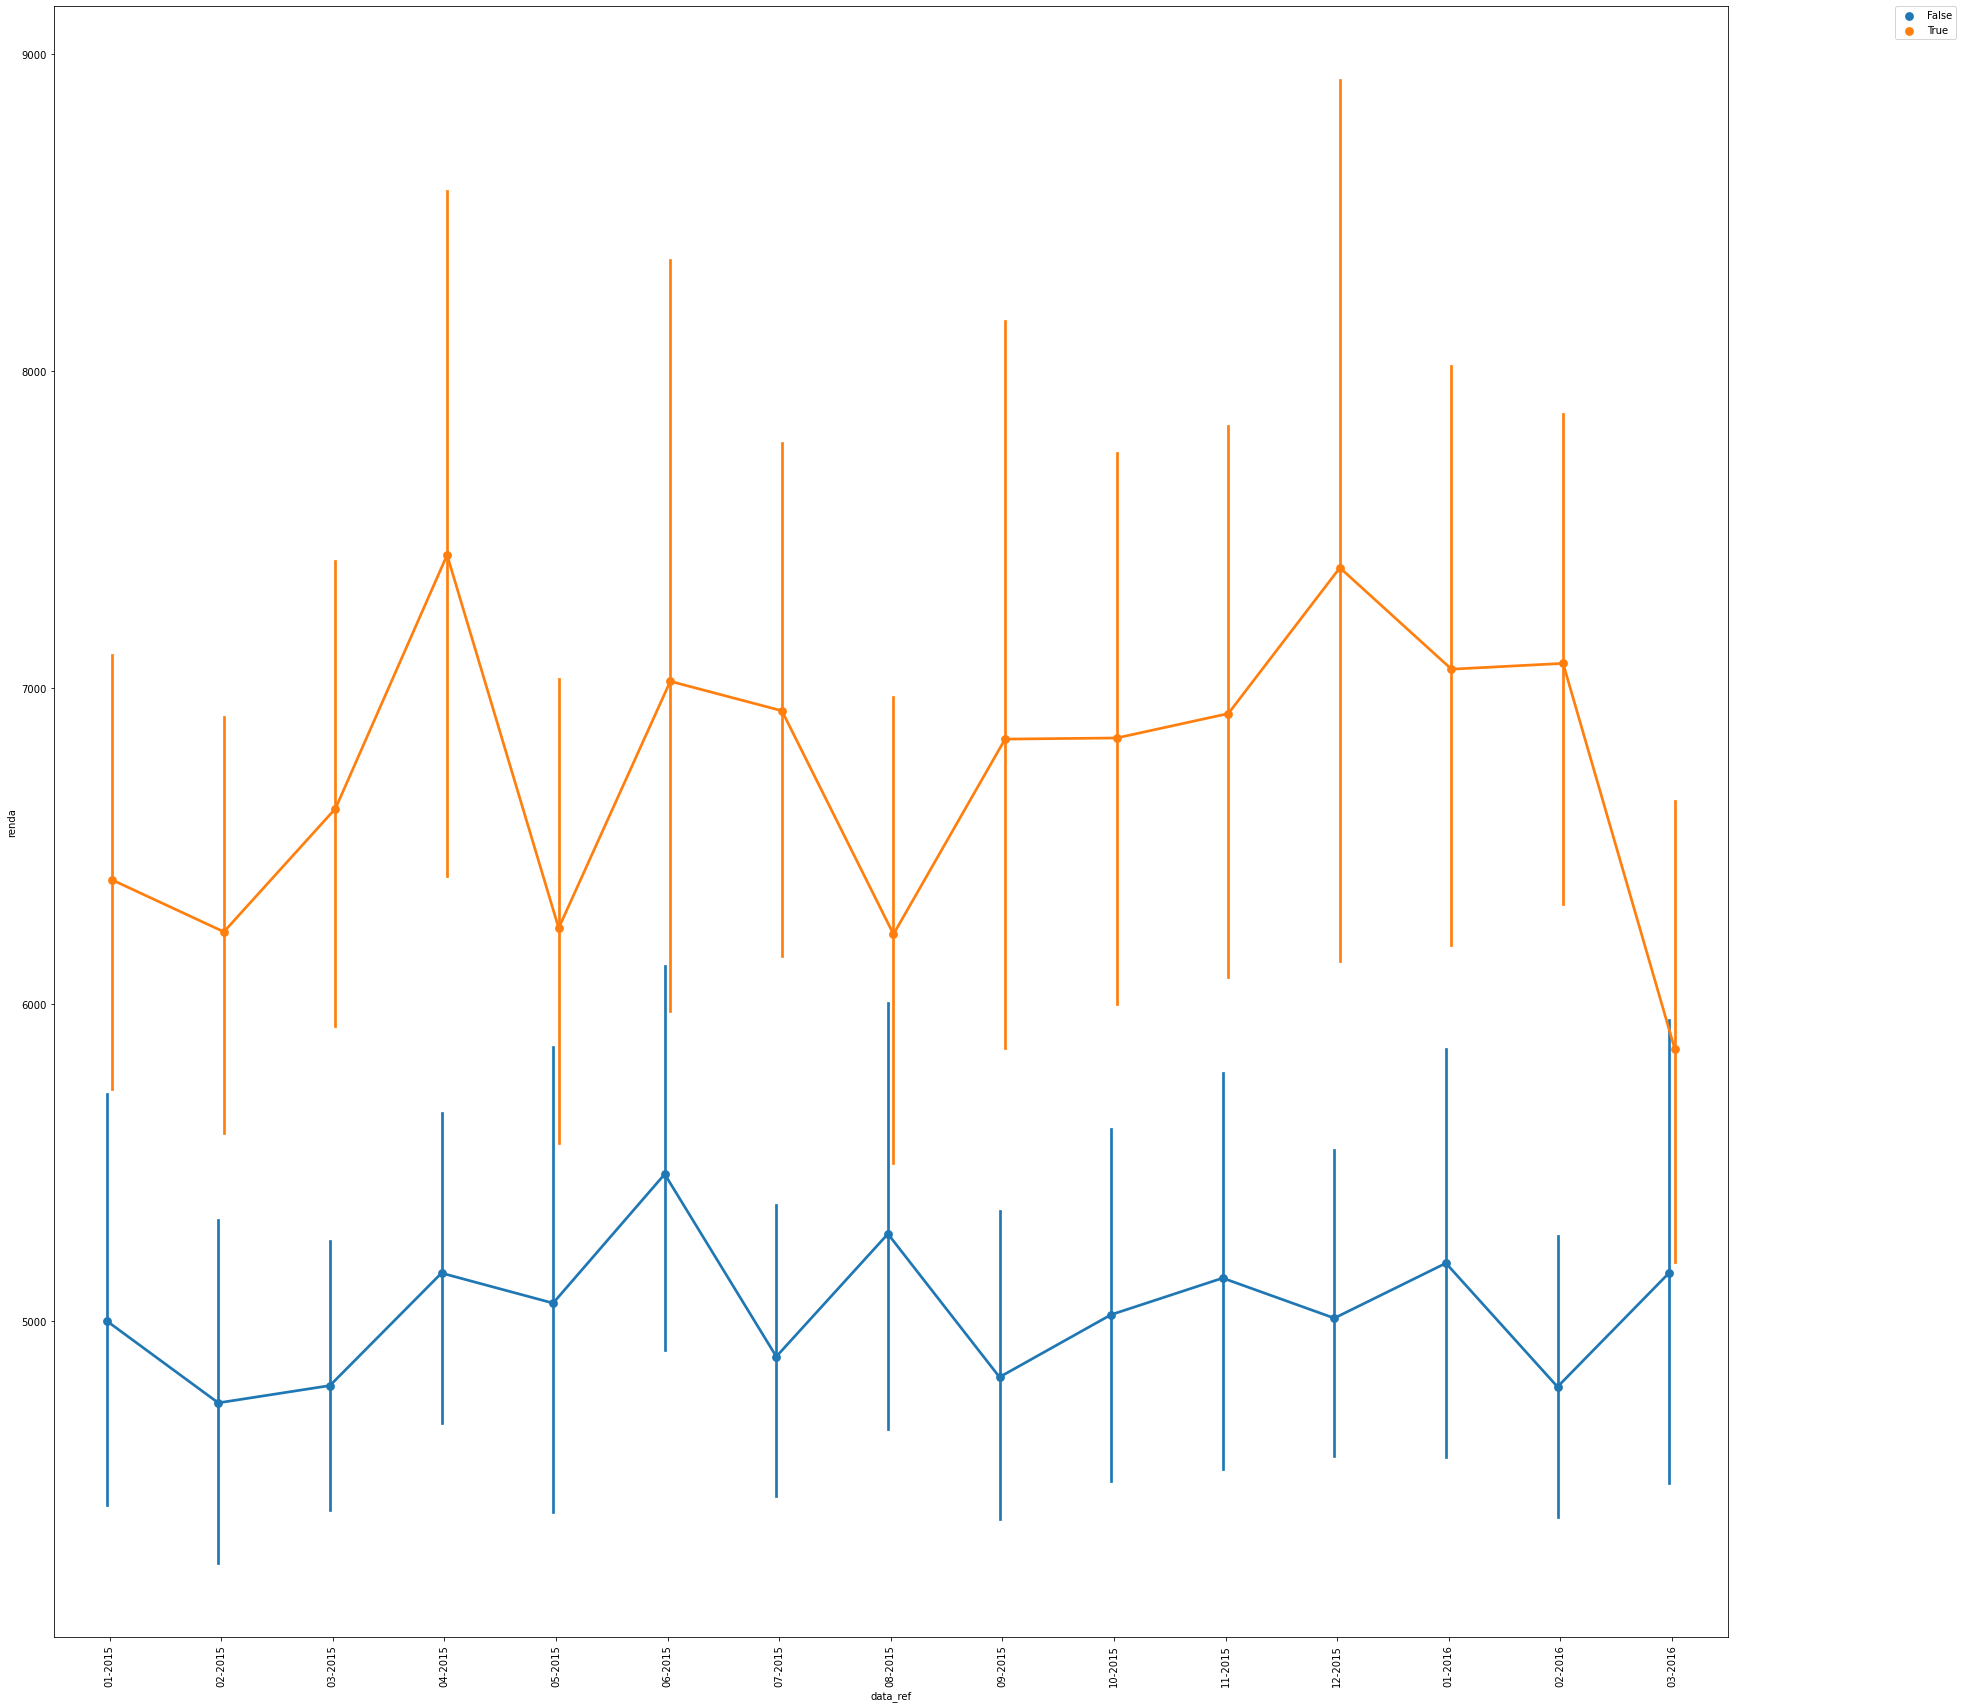

In [140]:
#variável posse de veículo por renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

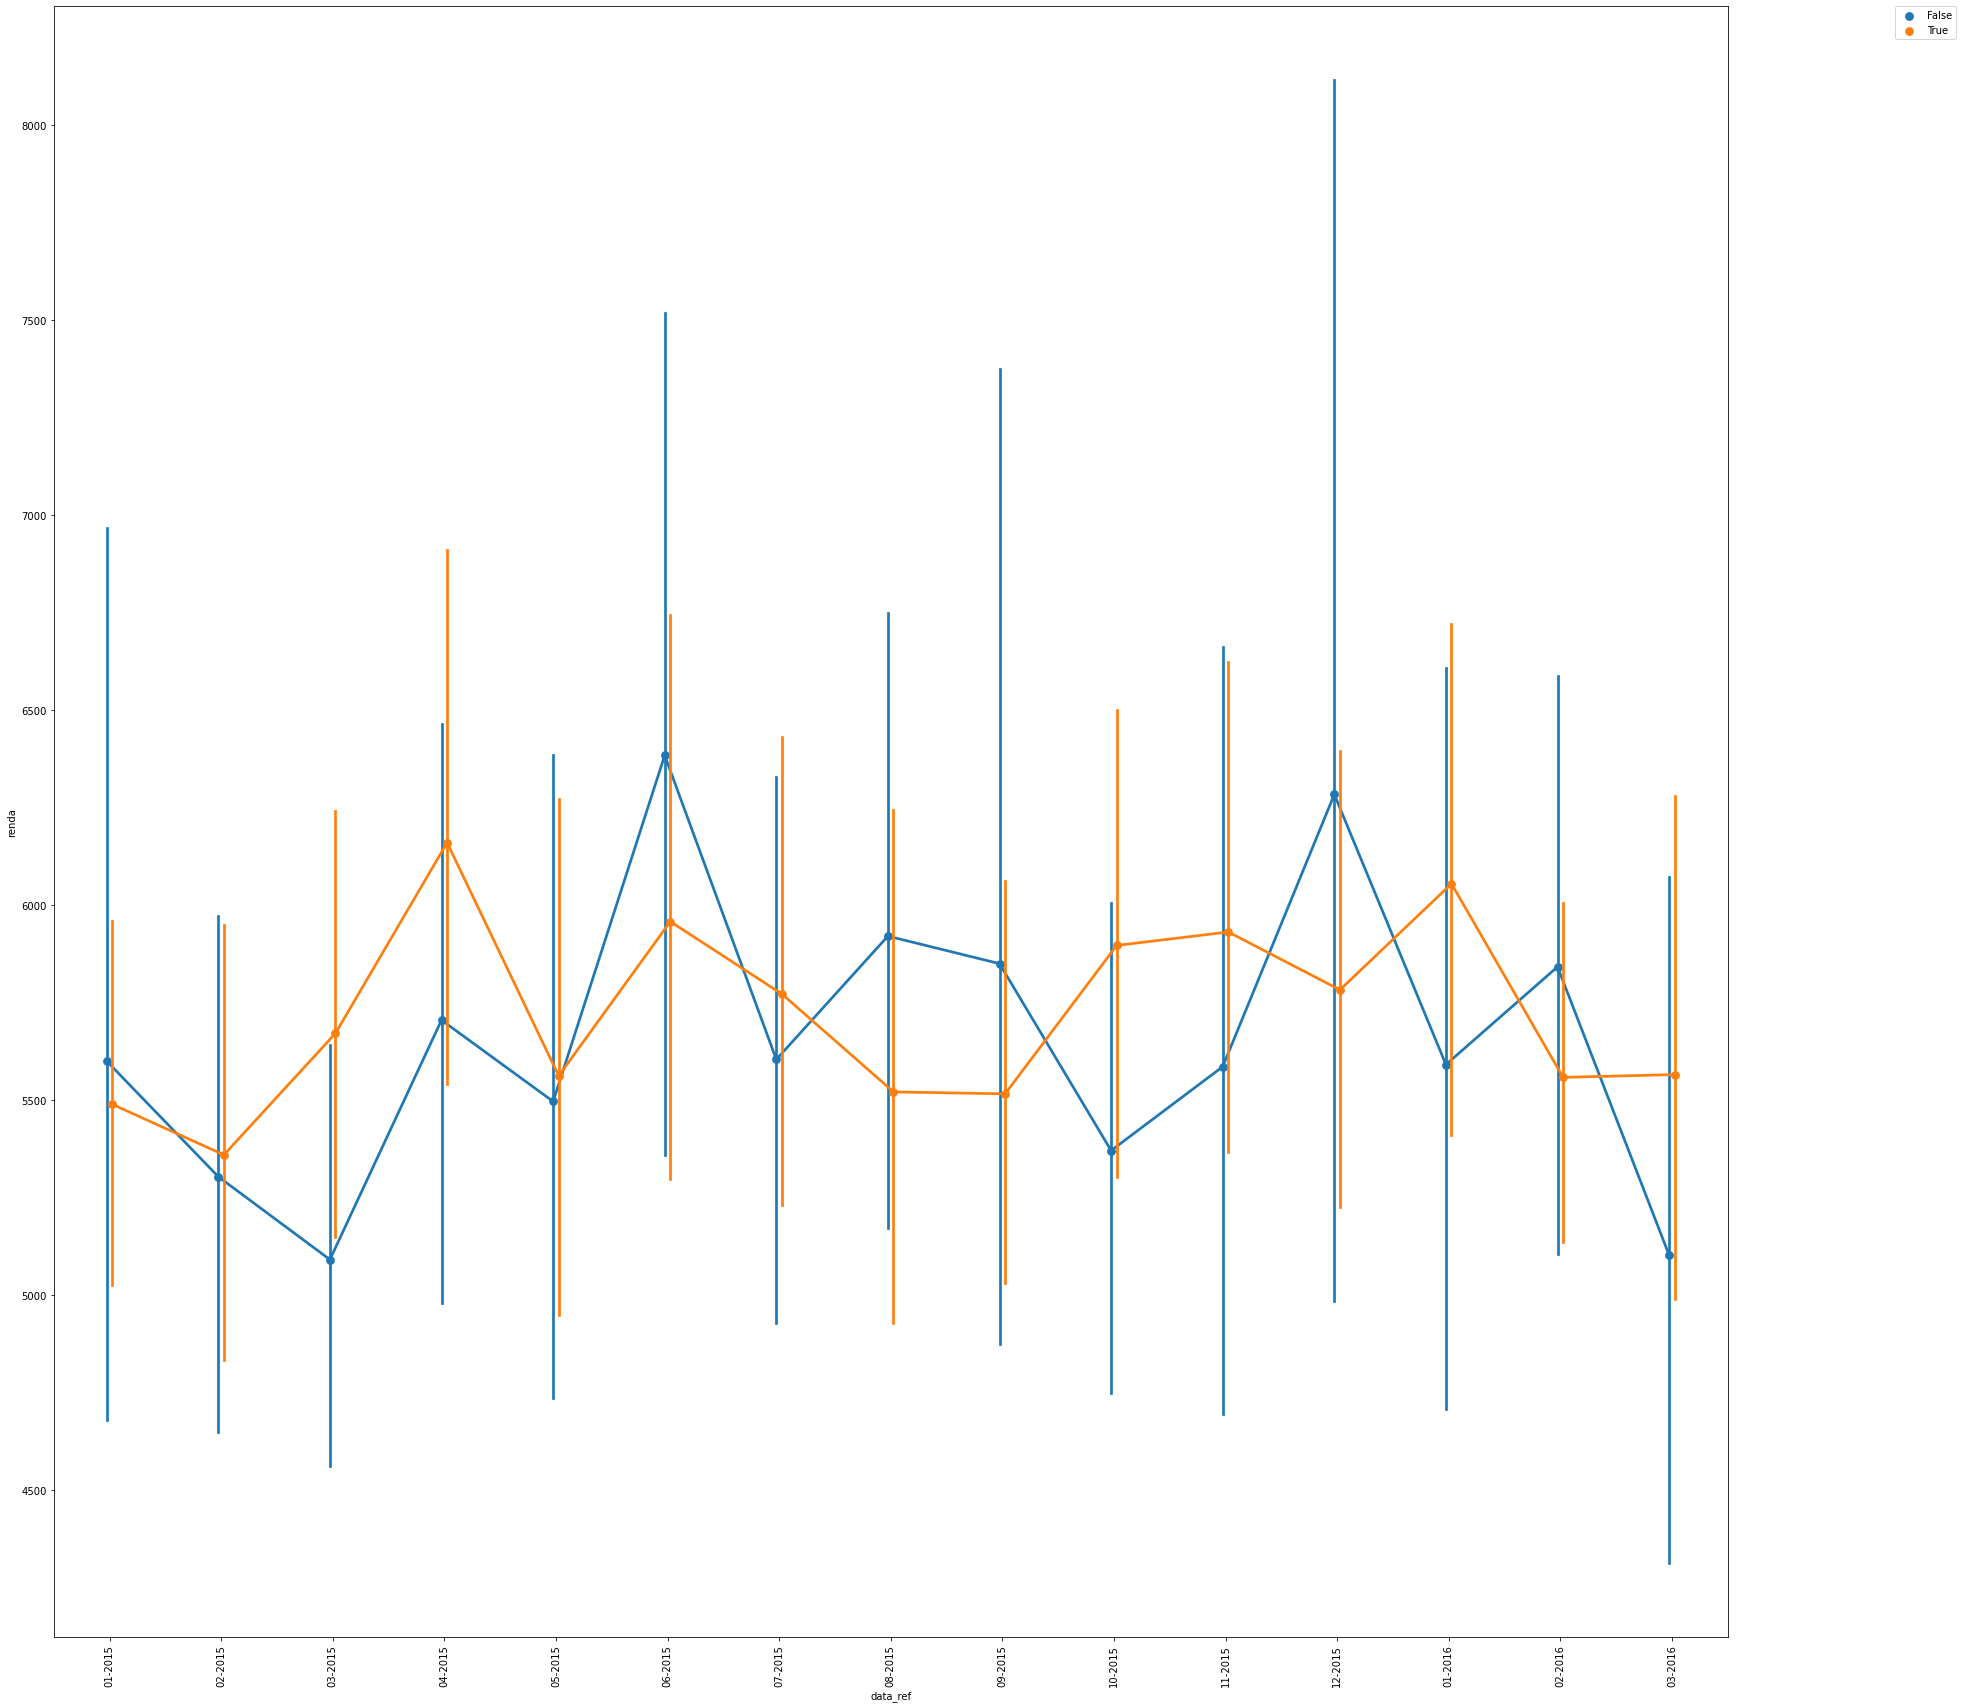

In [141]:
#variável posse de imóvel por renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

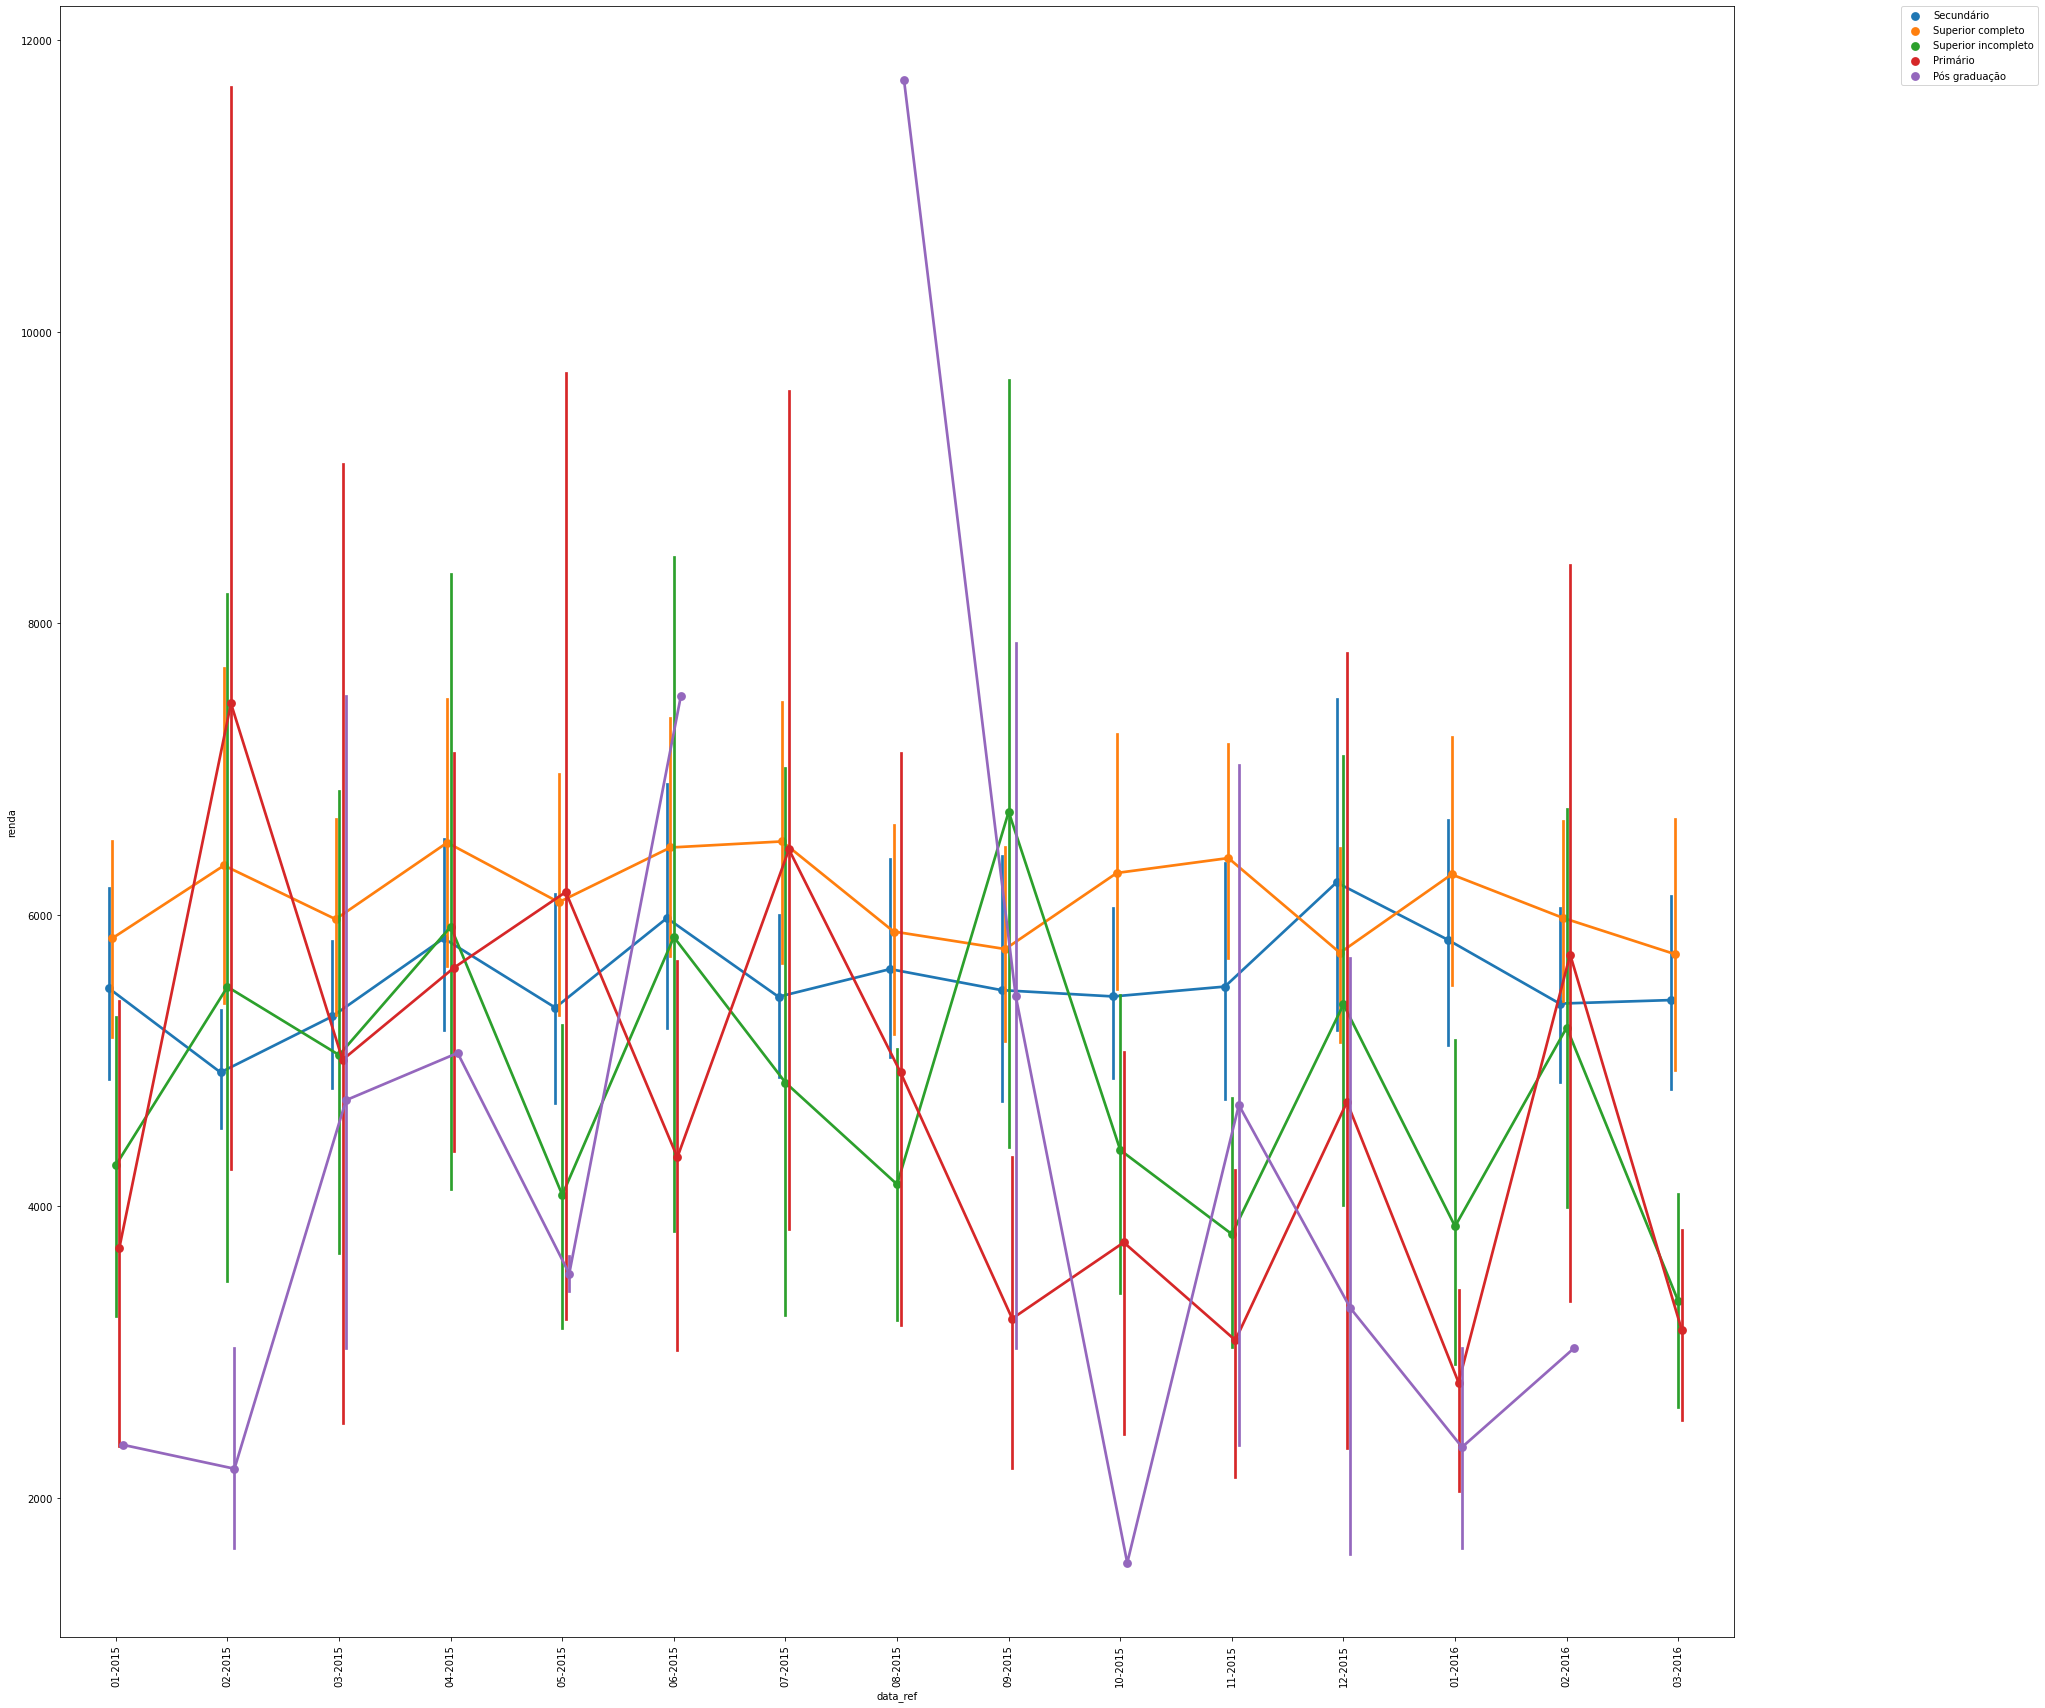

In [142]:
#variável educação

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='educacao',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

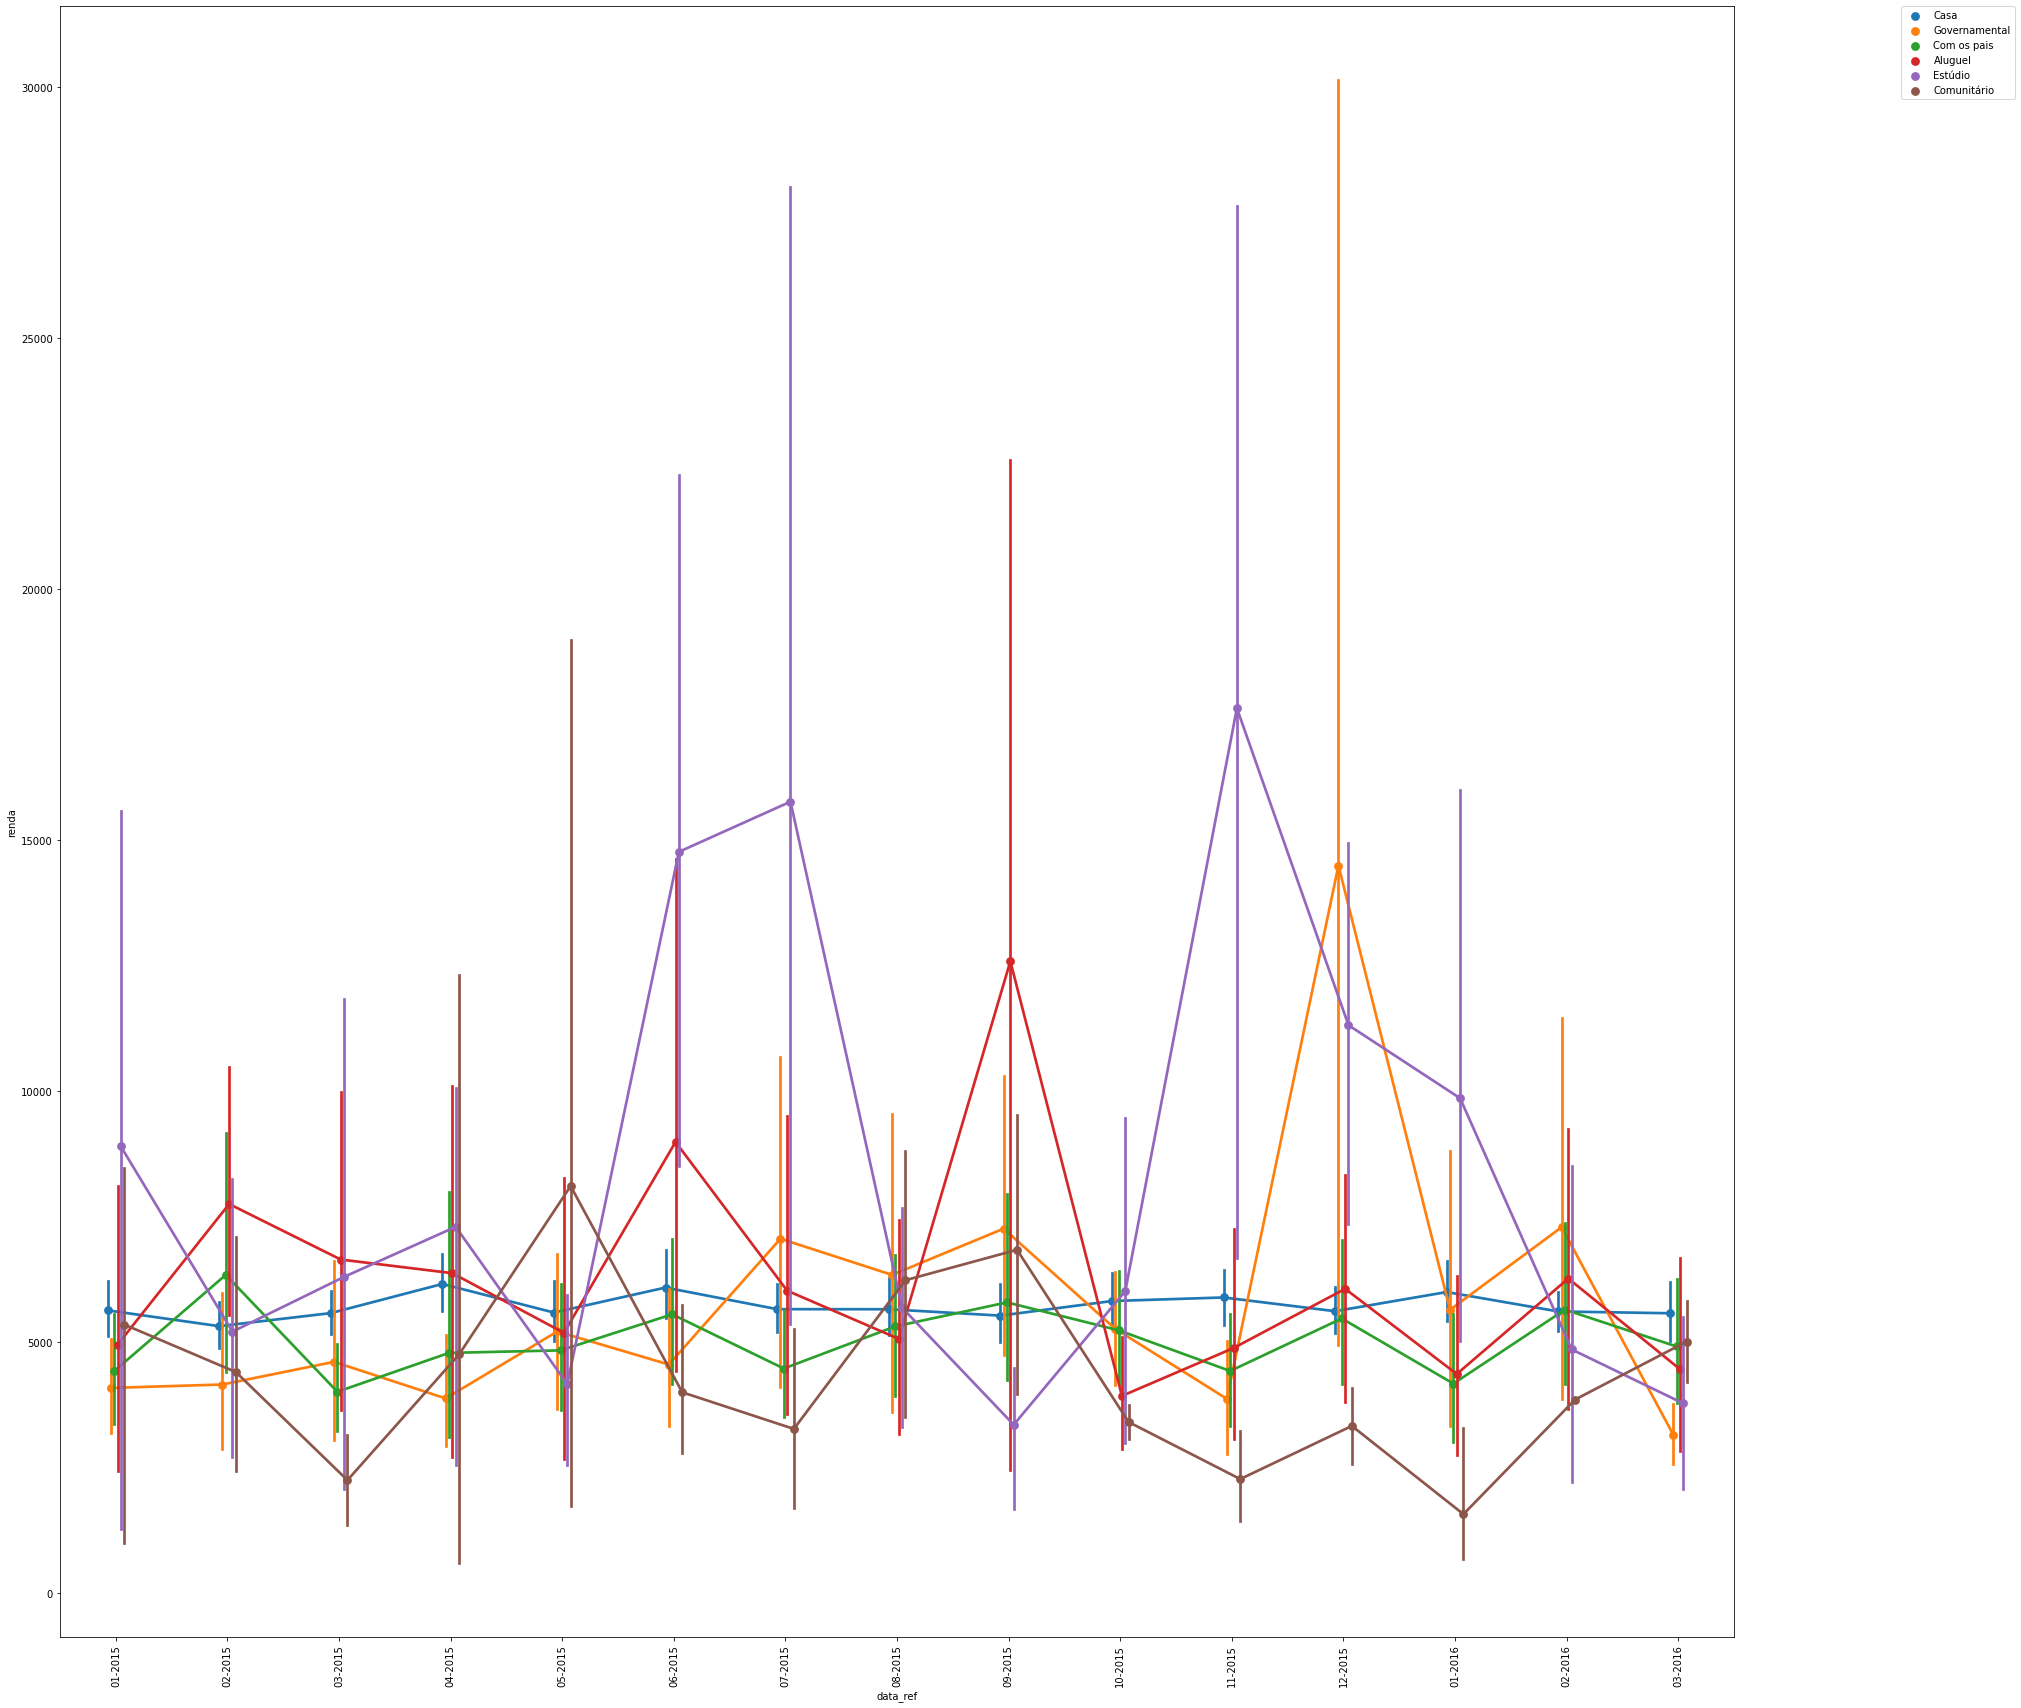

In [143]:
#variável tipo de residencia

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_residencia',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

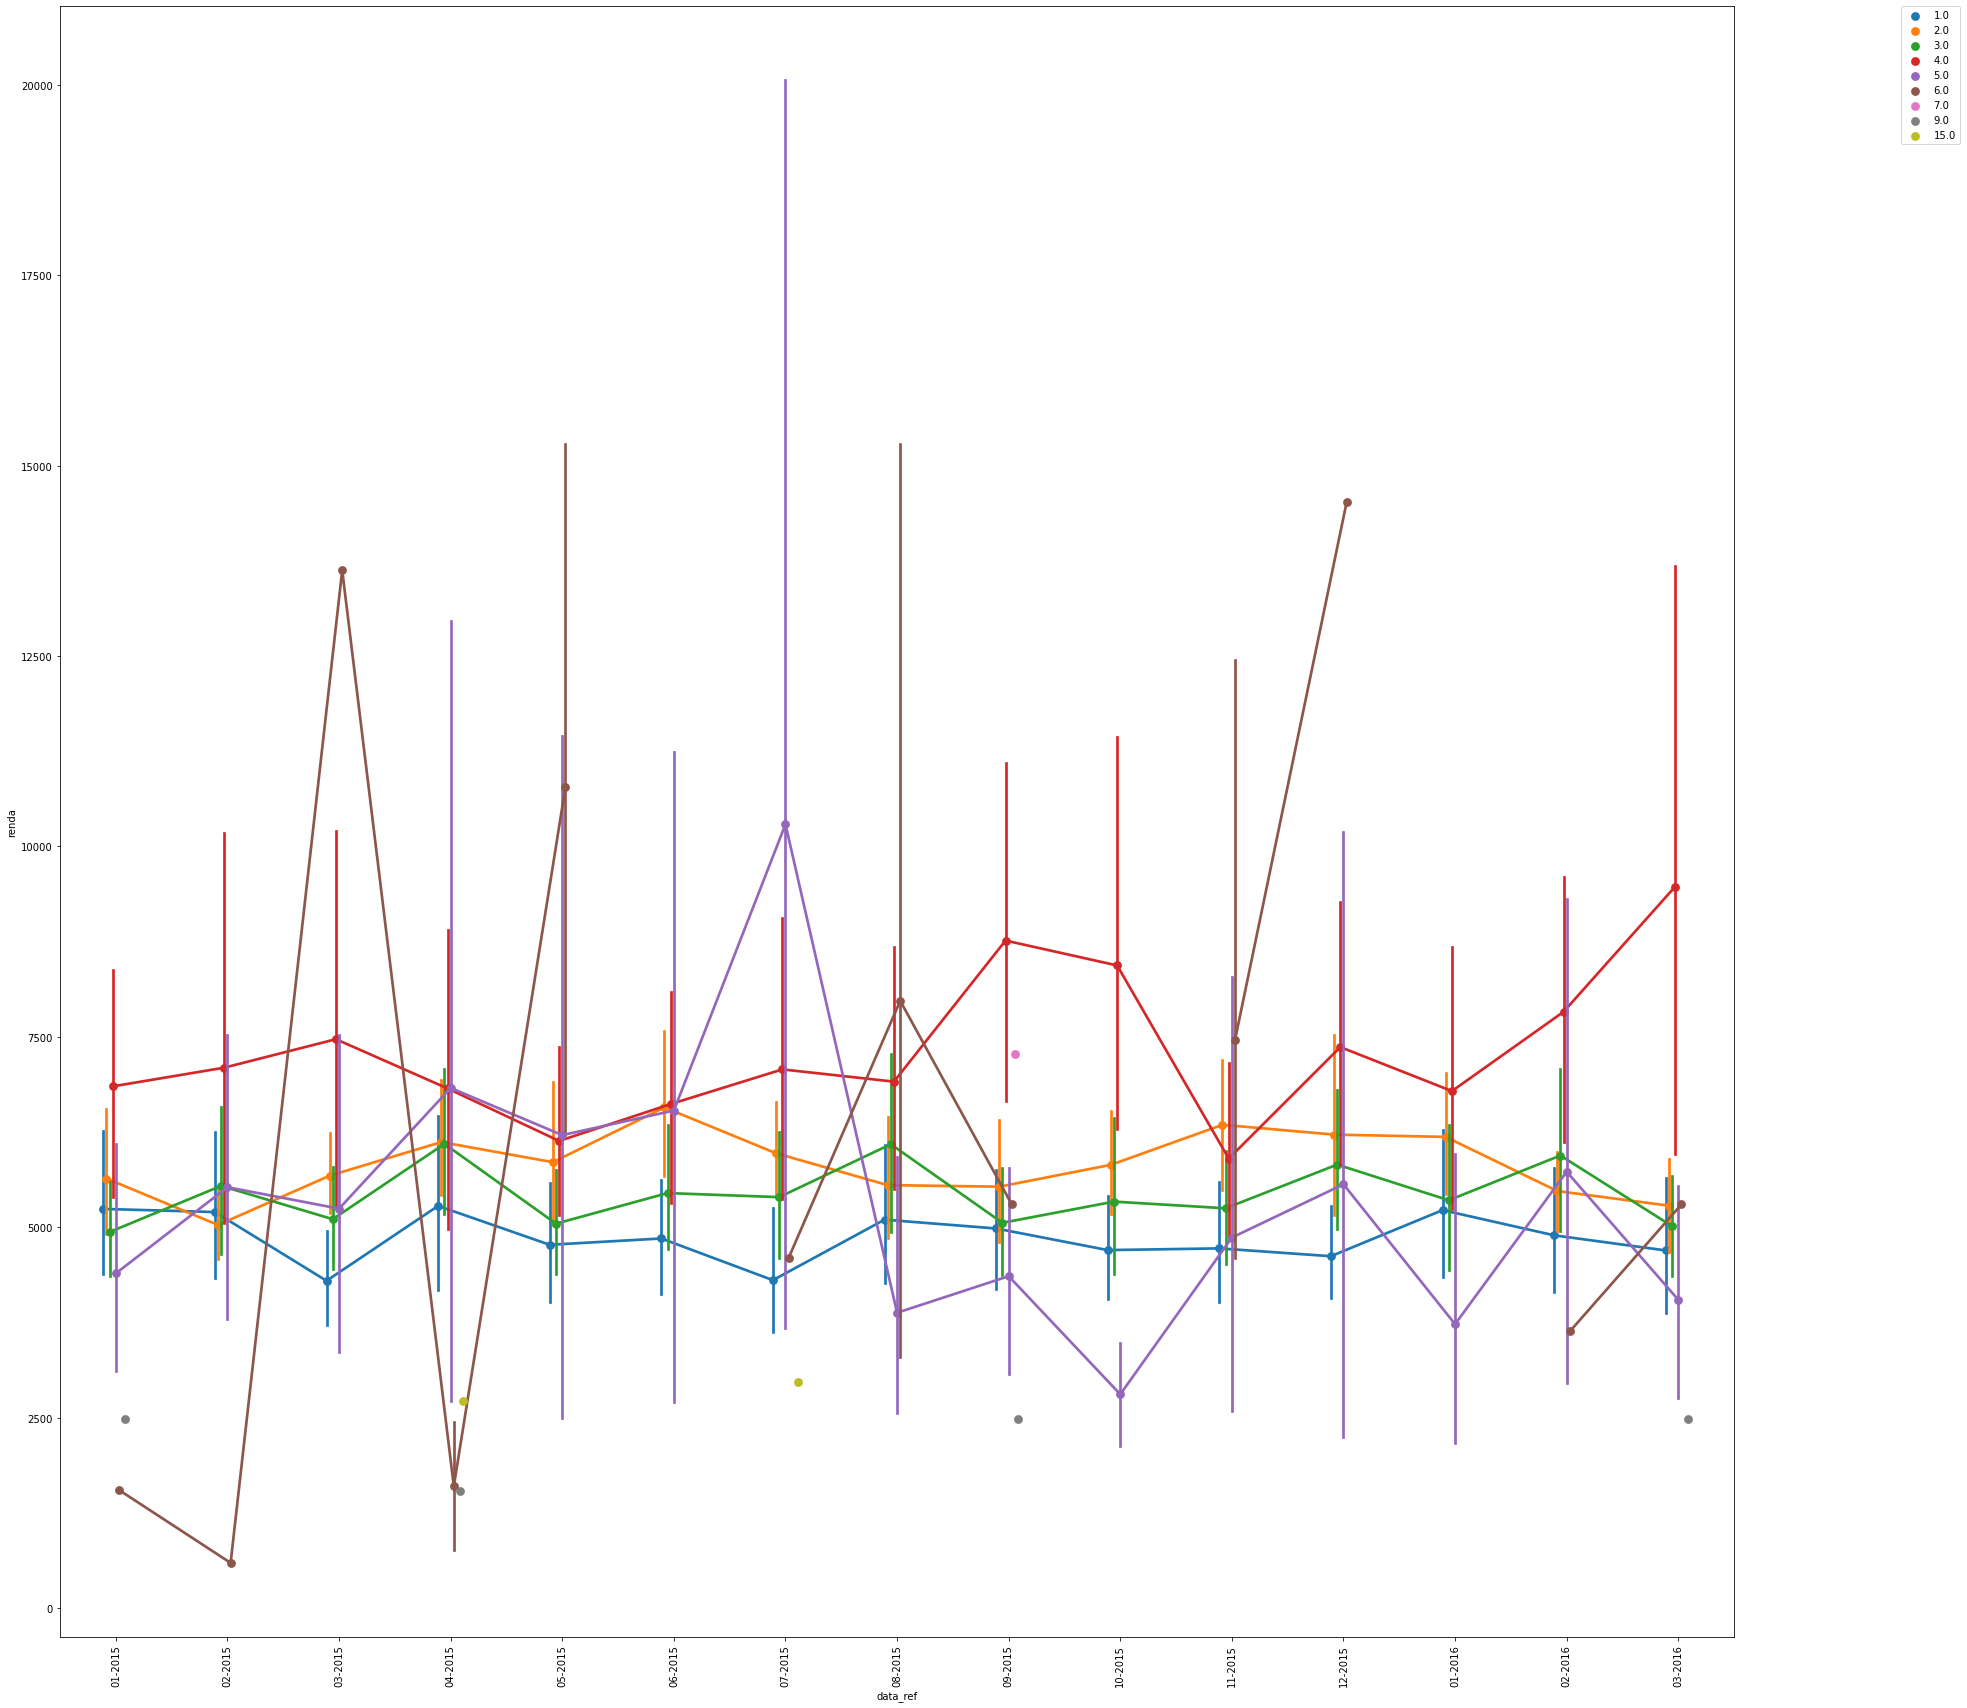

In [144]:
#variável quantidade de pessoas na residência

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qt_pessoas_residencia',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



## Limpeza dos dados

In [145]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   id_cliente             15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12427 non-null  float64       
 13  q

In [146]:
renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

In [147]:
renda.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [148]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [149]:
#tratamento de duplicadas

renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)
print(renda.shape)
print(renda.info())

(10447, 11)
(10447, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### transformando as variáveis em dummies

In [150]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], 
                      drop_first= True).copy()
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                             uint8
tipo_renda_Bolsista                uint8
tipo_renda_Empresário              uint8
tipo_renda_Pensionista             uint8
tipo_renda_Servidor público        uint8
educacao_Pós graduação             uint8
educacao_Secundário                uint8
educacao_Superior completo         uint8
educacao_Superior incompleto       uint8
estado_civil_Separado              uint8
estado_civil_Solteiro              uint8
estado_civil_União                 uint8
estado_civil_Viúvo                 uint8
tipo_residencia_Casa               uint8
tipo_residencia_Com os pais        uint8
tipo_residencia_Comunitário        uint8
tipo_residencia_Estúdio            uint8
tipo_residencia_Governamental      uint8
dtype: object

In [151]:
X = renda.drop(['renda'], axis=1).copy()
y = renda['renda']

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  uint8  
 6   tipo_renda_Bolsista            10447 non-null  uint8  
 7   tipo_renda_Empresário          10447 non-null  uint8  
 8   tipo_renda_Pensionista         10447 non-null  uint8  
 9   tipo_renda_Servidor público    10447 non-null  uint8  
 10  educacao_Pós graduação         10447 non-null  uint8  
 11  educacao_Secundário            10447 non-null  uint8  
 12  educacao_Superior completo     10447 non-null 

In [153]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10447 entries, 0 to 10446
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
10447 non-null  float64
dtypes: float64(1)
memory usage: 81.7 KB


### Rodando o modelo


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= True)

In [155]:
reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [156]:
mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = 'O R-quadrado da árvore com profundidade {0} é: {1:.2f}'

print(template.format(reg1.get_depth(),mse1).replace('.',','))
print(template.format(reg2.get_depth(),mse2).replace('.',','))

O R-quadrado da árvore com profundidade 4 é: 0,14
O R-quadrado da árvore com profundidade 8 é: 0,36


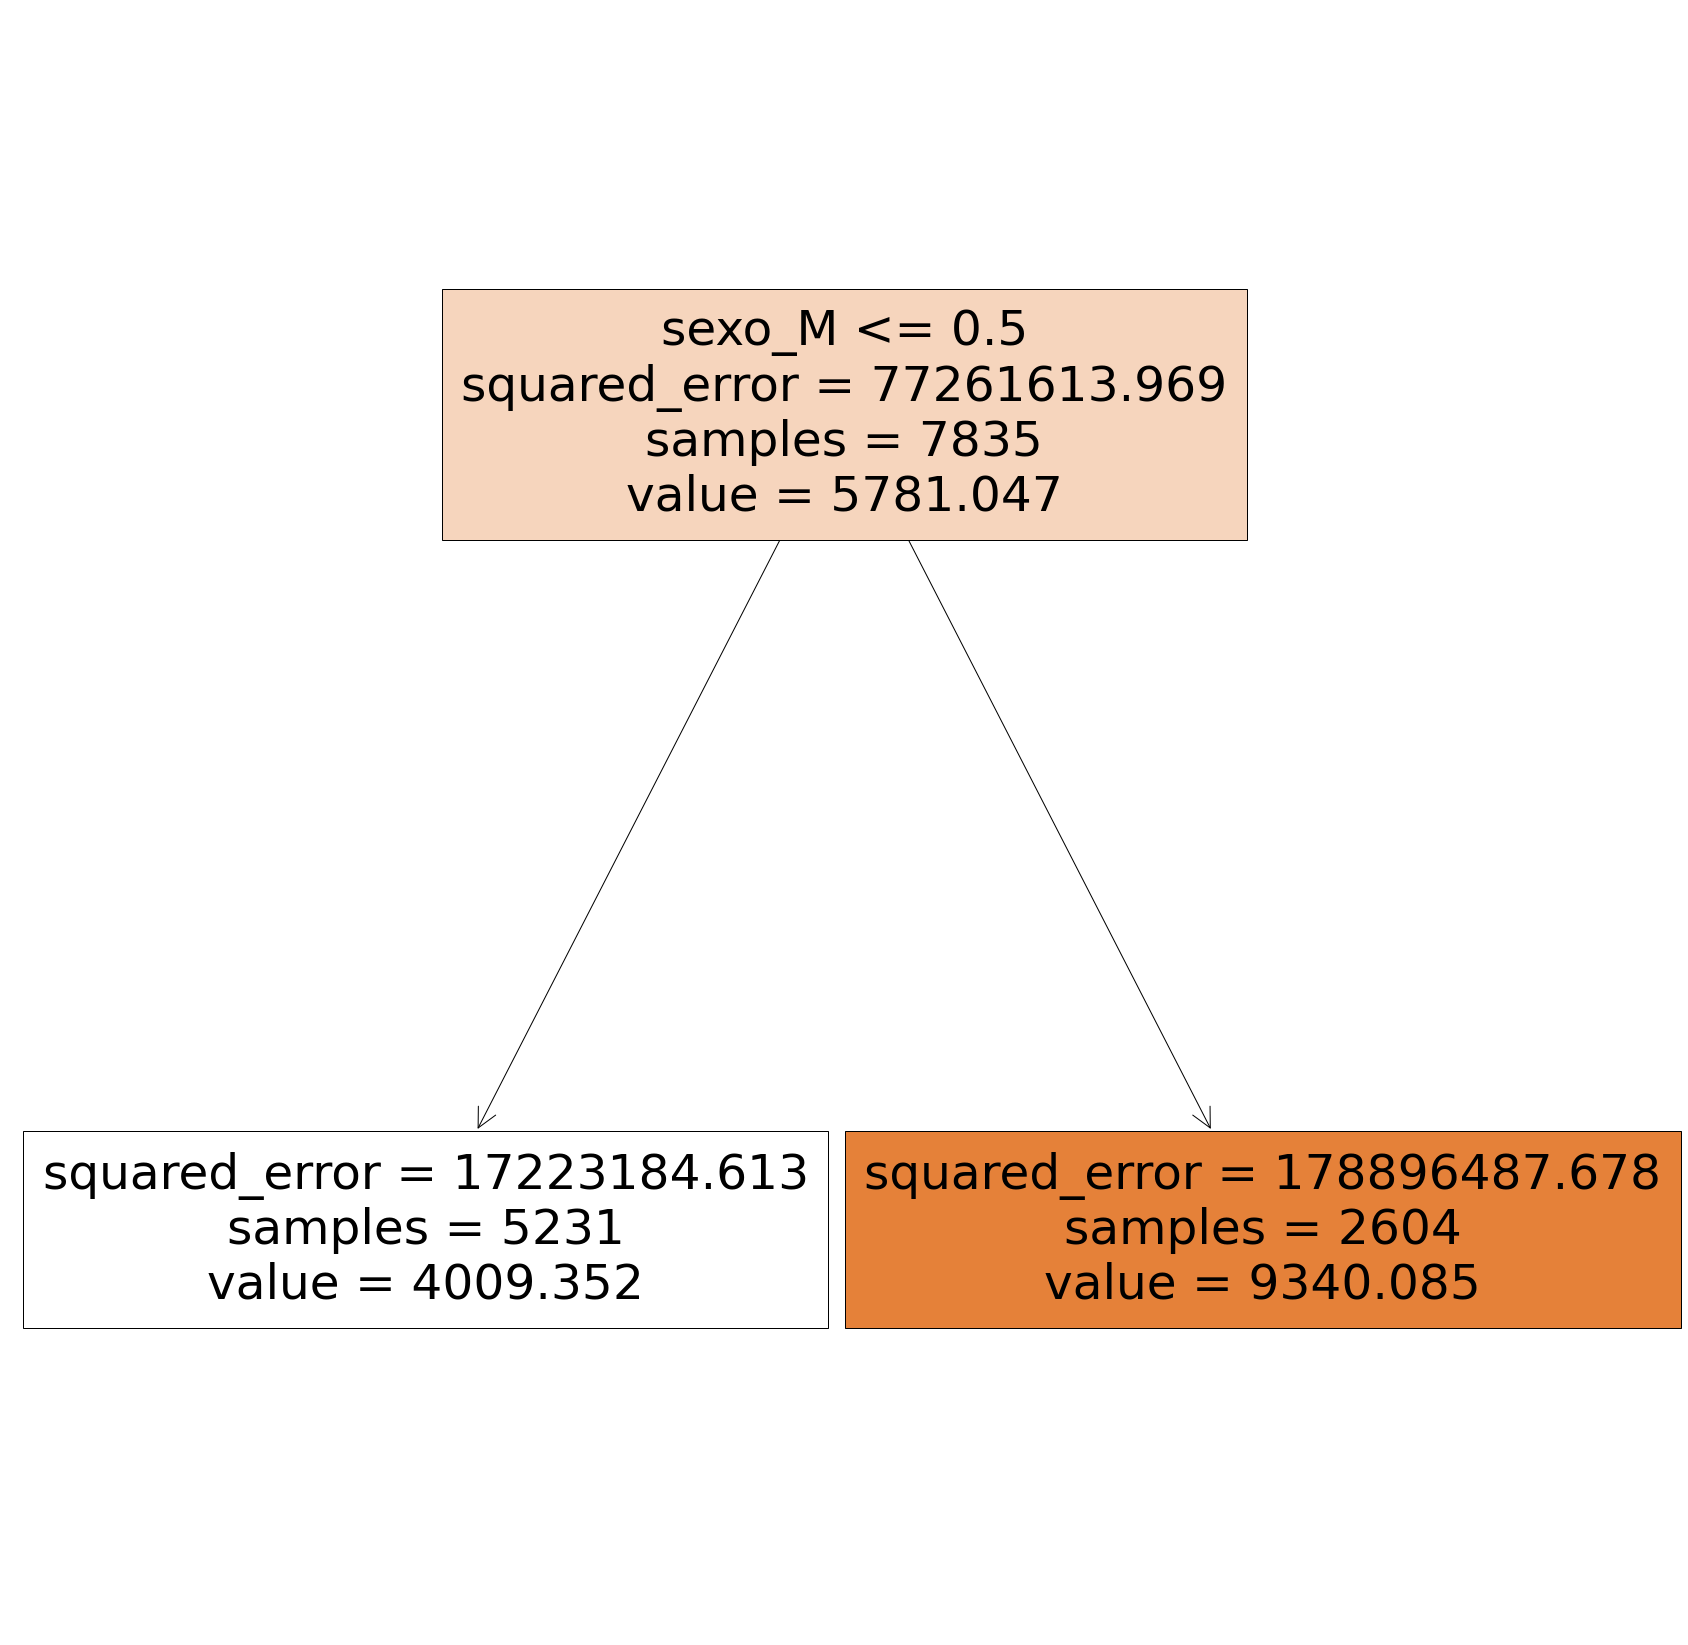

In [160]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(reg2,
                   feature_names=X_test.columns,
                   filled=True)

In [161]:
#pré poda

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

0.08062727579141071

<AxesSubplot:xlabel='n_minimo', ylabel='profundidade'>

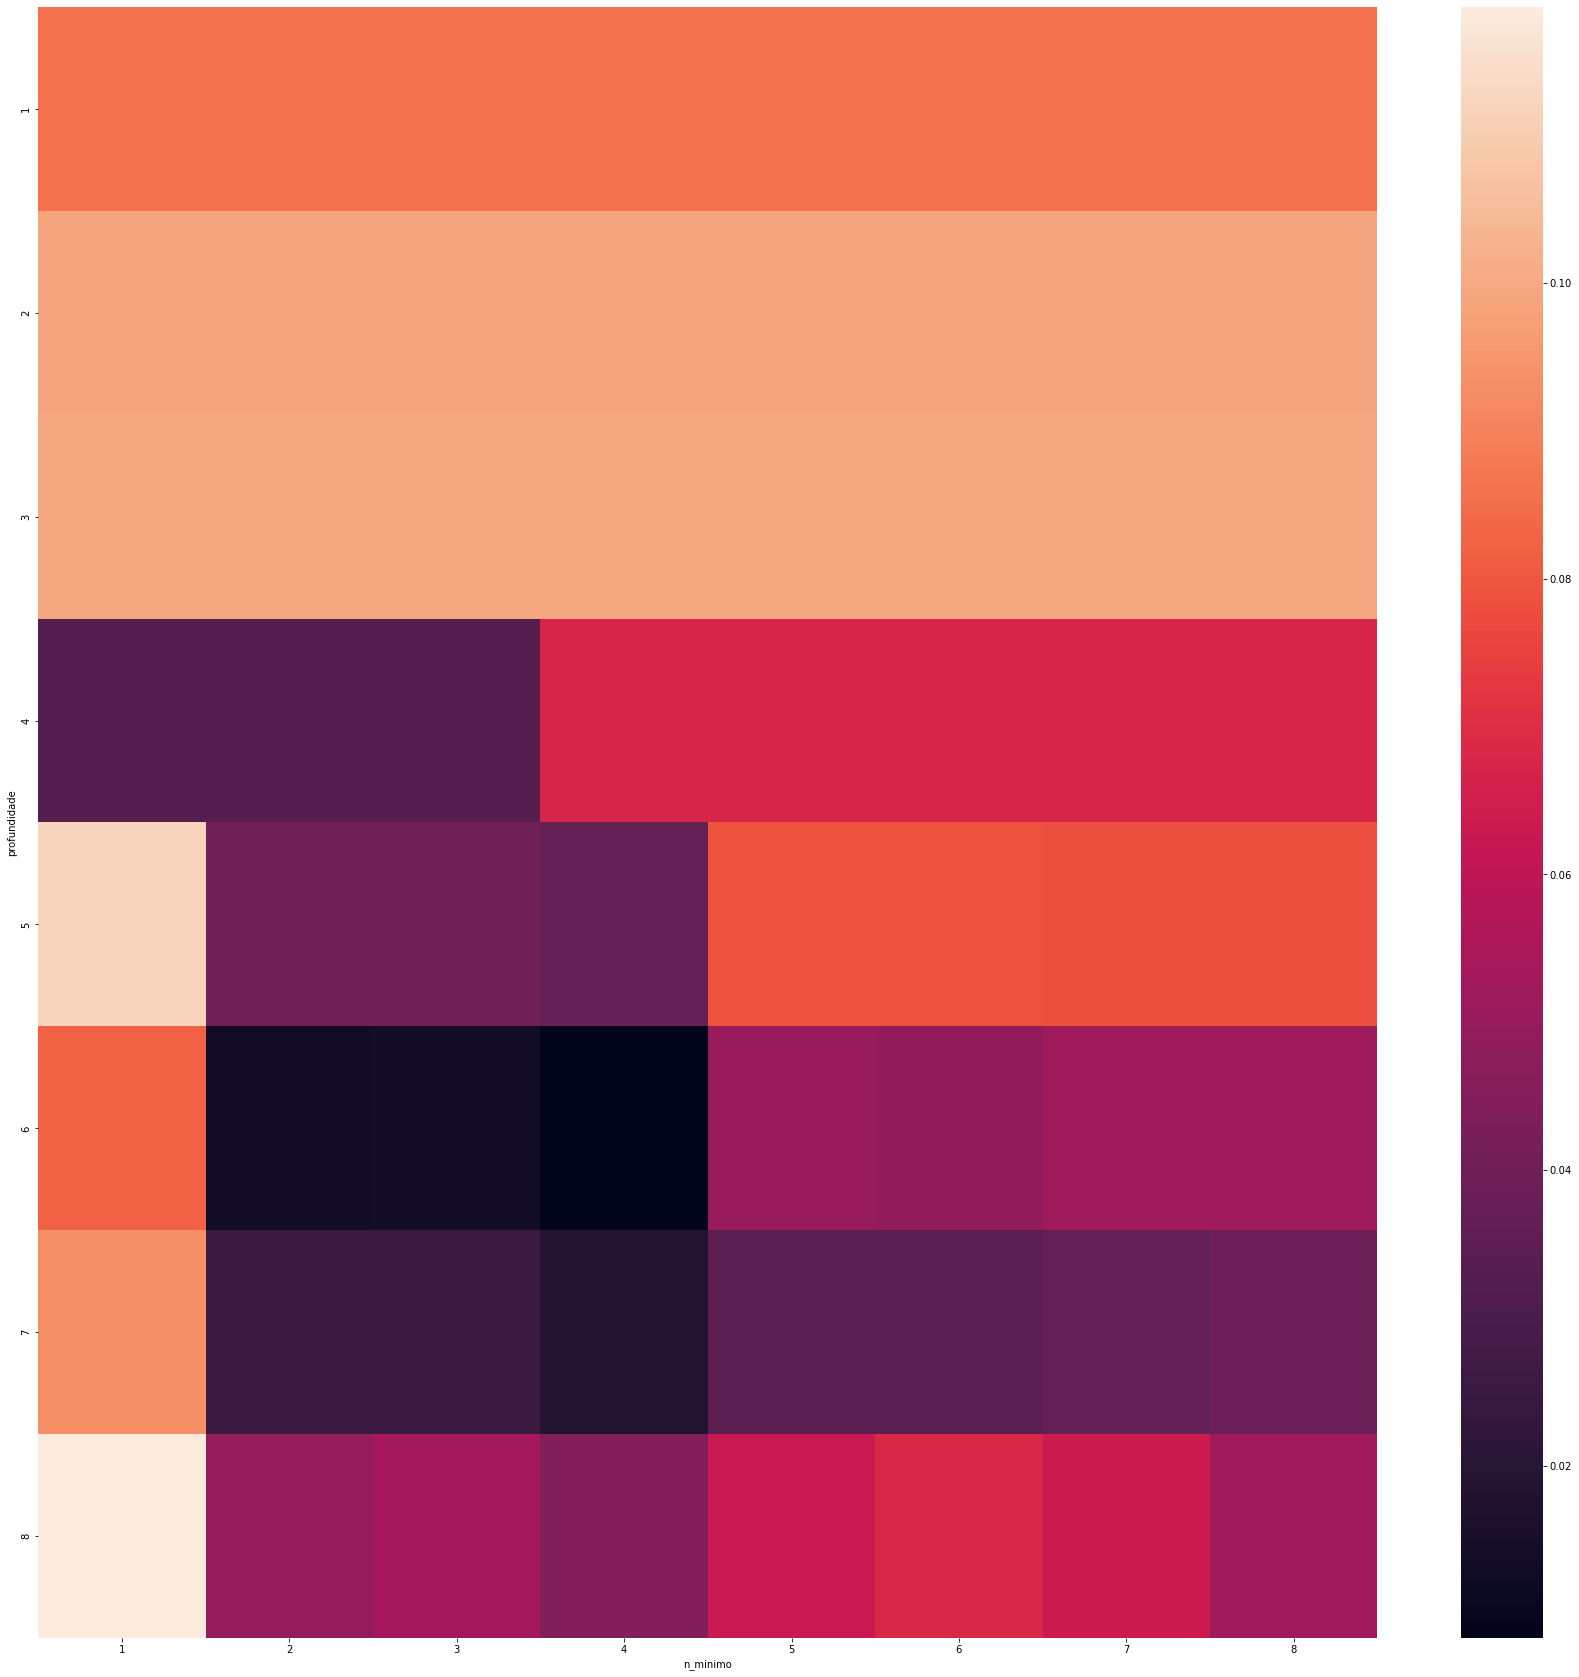

In [163]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))


## Etapa 5 Crisp-DM: Avaliação dos resultados


In [196]:
print(f'R-quadrado de treino é: {reg2.score(X_train, y_train)*100:.2f}%')

R-quadrado de treino é: 23.59%


In [197]:
print(f'R-quadrado de teste é: {reg2.score(X_test, y_test)*100:.2f}%')

R-quadrado de teste é: 5.26%


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.